# COVID-19 B-cell Epitope Prediction

-----

### Problem statement:

B-cells inducing antigen-specific immune responses in vivo produce large amounts of antigen-specific antibodies by recognizing the subregions (epitope regions) of antigen proteins. They can inhibit their functioning by binding antibodies to antigen proteins. Predicting of epitope regions is beneficial for the design and development of vaccines aimed to induce antigen-specific antibody production. Producing vaccine is a rigorous process, it needs accurate predictions. In our project by using those features of protein of different patients, we are trying to get best results to predict epitope regions.

----

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [2]:
#pip install pydotplus
# import the functions for visualizing the decision tree
import pydotplus #If this doesnt work please uncomment first line and rerun
from IPython.display import Image  

import random
import graphviz

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [4]:
# load the csv file
df = pd.read_csv('b_cell.csv')

# display the first five observations
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016000,0.703000,1.018000,2.220000,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770000,0.179000,1.199000,-3.860000,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852000,3.427000,0.960000,4.280000,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410000,2.548000,0.936000,6.320000,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214000,1.908000,0.937000,4.640000,6.867493,0.103846,-0.578846,21.684615,1


In [5]:
# check data types of variables
df.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

<a id="dp"> </a>
## 1. Data Preprocessing

In [6]:
# check the size of data
df.shape

(14387, 14)

In [7]:
df['peptide_length']=df['end_position'] - df['start_position']+1

In [8]:
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,peptide_length
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016000,0.703000,1.018000,2.220000,5.810364,0.103275,-0.143829,40.273300,1,5
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770000,0.179000,1.199000,-3.860000,6.210876,0.065476,-0.036905,24.998512,1,5
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852000,3.427000,0.960000,4.280000,8.223938,0.091787,0.879227,27.863333,1,5
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410000,2.548000,0.936000,6.320000,4.237976,0.044776,-0.521393,30.765373,1,5
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214000,1.908000,0.937000,4.640000,6.867493,0.103846,-0.578846,21.684615,1,5


In [9]:
#Drop the columns which are not necessary
df=df.drop(['start_position','end_position'],axis=1)

### Outlier Treatment using IQR method

In [10]:
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)
num_cols

['chou_fasman',
 'emini',
 'kolaskar_tongaonkar',
 'parker',
 'isoelectric_point',
 'aromaticity',
 'hydrophobicity',
 'stability',
 'target',
 'peptide_length']

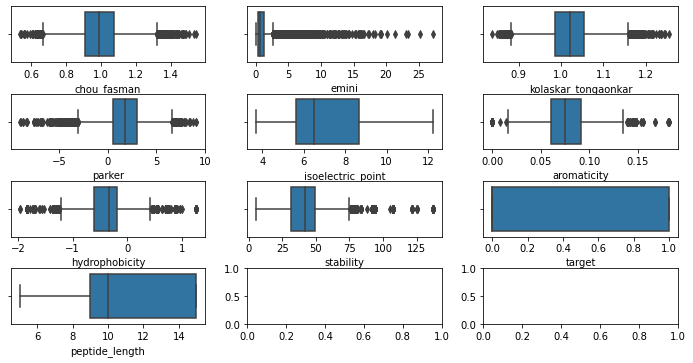

In [11]:
fig, ax = plt.subplots(4, 3, figsize=(10,5))
fig.tight_layout()
k=0
for col in num_cols:
    i, j = divmod(k, 3)
    sns.boxplot(x=col, data=df, ax=ax[i,j])
    k+=1

In [12]:
# calculate the first quartile
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df = df.reset_index(drop=True)

# check the shape of the data
df.shape

(11390, 13)

### Split the dependent and independent variables.

In [13]:
# store the target variable "y" in a dataframe 'df_target'
df_target = df['target']

# store all the independent variables in a dataframe 'df_feature' 
df_feature = df.drop('target', axis = 1)

### Treating the missing values

In [14]:
# sort the variables on the basis of total null values in the variable
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df_feature.isnull().sum()*100/df_feature.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
peptide_length,0,0.000000
target,0,nan
stability,0,0.000000
hydrophobicity,0,0.000000
aromaticity,0,0.000000
isoelectric_point,0,0.000000
parker,0,0.000000
kolaskar_tongaonkar,0,0.000000
emini,0,0.000000
chou_fasman,0,0.000000


_There are no missing values in this data set_

#### Remove the unnecessary variables that will not contribute to the model.

In [15]:
# find the standard deviation for the numeric variables
df_feature.std()

chou_fasman            0.110642
emini                  0.592165
kolaskar_tongaonkar    0.045820
parker                 1.606183
isoelectric_point      1.760054
aromaticity            0.024465
hydrophobicity         0.264172
stability             11.441114
peptide_length         2.812445
dtype: float64

### Visualization

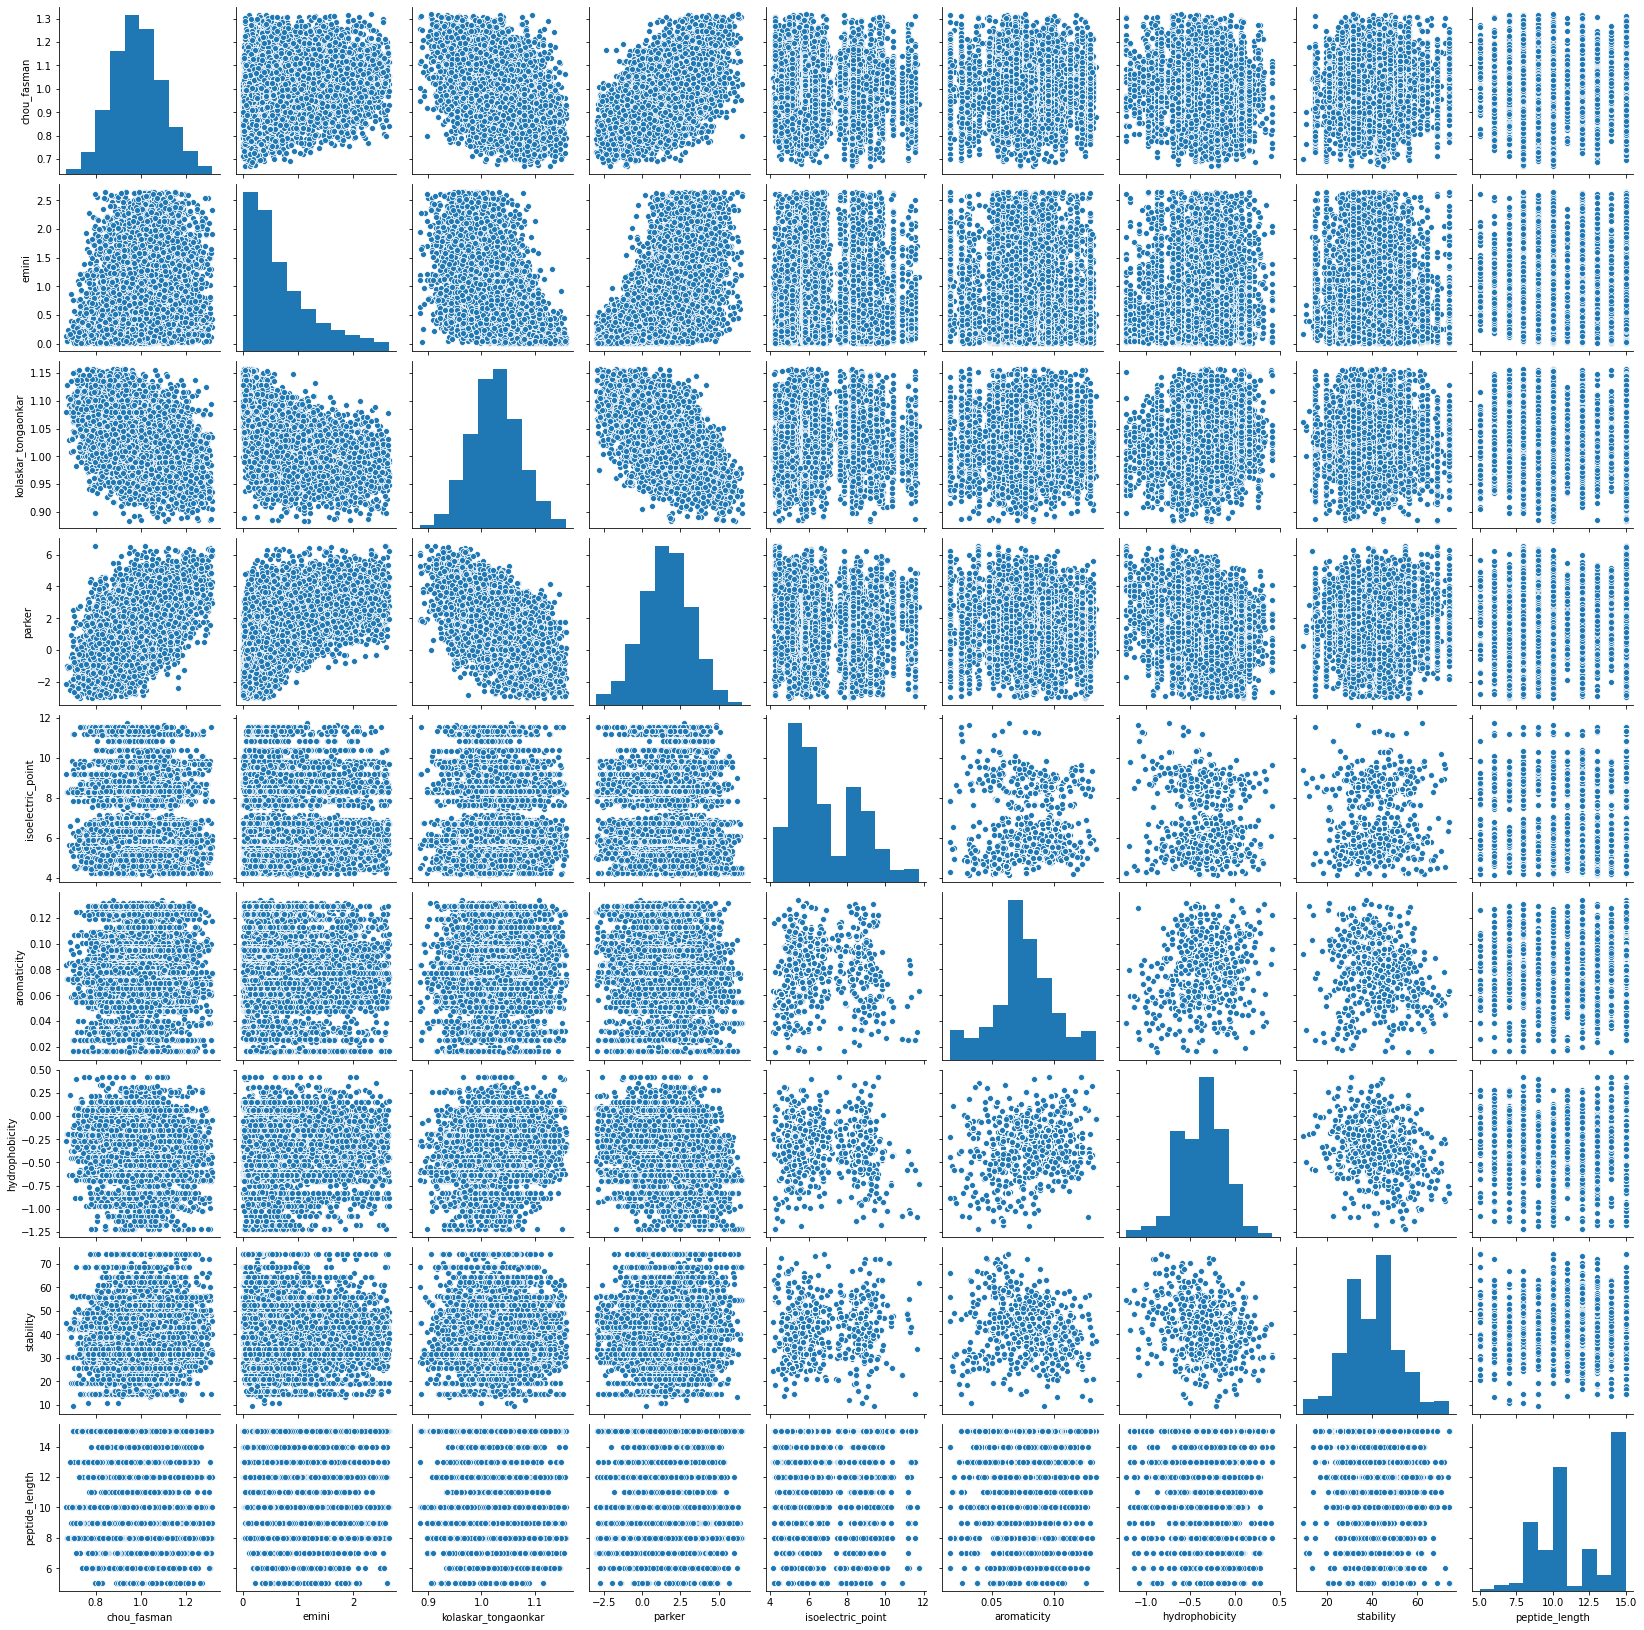

In [16]:
sns.pairplot(df_feature)

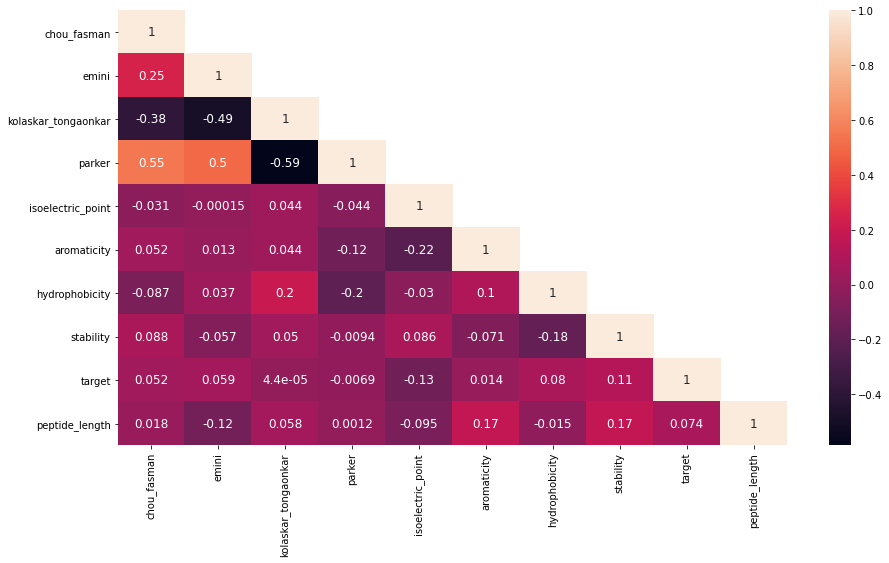

In [17]:
# set plot size
plt.figure(figsize = (15,8))

# use 'mask' to plot a upper triangular correlation matrix 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask, k = 1)] = True

sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 12}, mask = mask)

# display the plot
plt.show()

In [18]:
df['peptide_length'].value_counts()/len(df)*100

15   31.843723
10   26.233538
8    14.591747
12    8.972783
9     8.674276
13    3.459175
14    1.922739
7     1.615452
6     1.194030
11    1.071115
5     0.421422
Name: peptide_length, dtype: float64

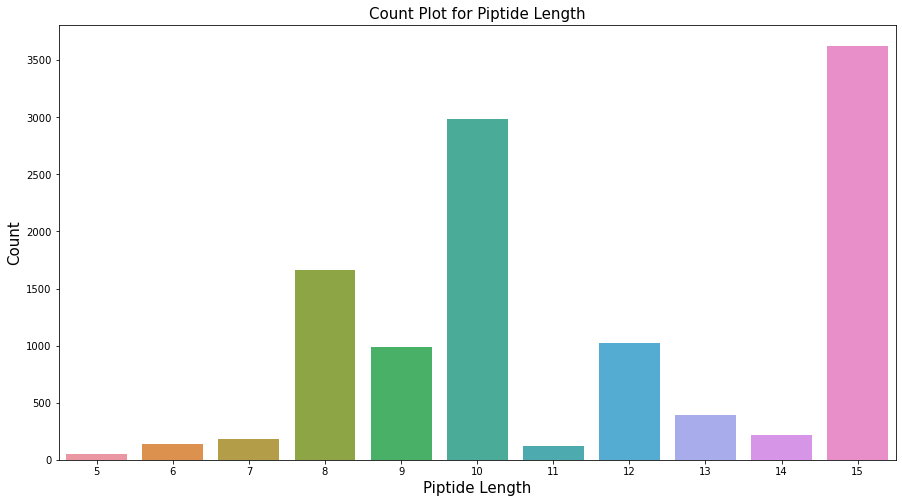

In [19]:
sns.countplot(x = df['peptide_length'])

plt.title('Count Plot for Piptide Length', fontsize = 15)
plt.xlabel('Piptide Length', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

Most of the peptides are of length 15(32%),10(26%) and 8(15%) respectively.

----

<Figure size 2160x2160 with 0 Axes>

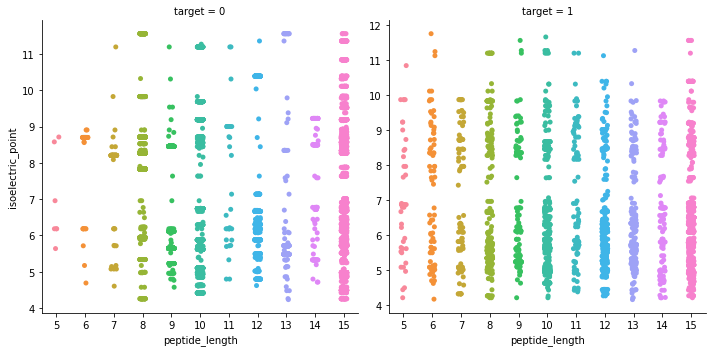

In [20]:
plt.figure(figsize=(30,30))
sns.catplot(y='isoelectric_point',x='peptide_length',data=df, ci=None,col='target', sharey=False)

#### INSIGHTS-

1. The number of peptides of length 8,10 and 15 have certainly strong values of isoelectric point at range above 7 at negative target.
2. In another figure,most of the values of peptide_length have greater range of values below 7 having low isoelectric point at positive target.

<Figure size 2160x2160 with 0 Axes>

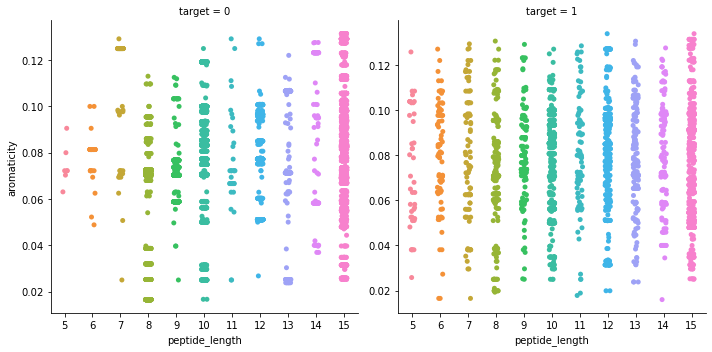

In [21]:
plt.figure(figsize=(30,30))
sns.catplot(y='aromaticity',x='peptide_length',data=df, ci=None,col='target', sharey=False)

#### INSIGHTS-

1. Most of the peptides have range of aromaticity within range of 0.05 to 0.10 at negative target.
2. Most of the peptides have range of aromaticity within range of 0.04 to 0.12 at positive target.

<Figure size 2160x2160 with 0 Axes>

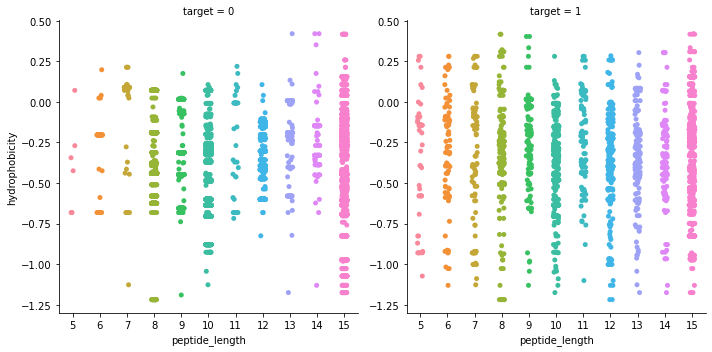

In [22]:
plt.figure(figsize=(30,30))
sns.catplot(y='hydrophobicity',x='peptide_length',data=df, ci=None,col='target', sharey=False)

#### INSIGHTS-

Here most of the peptides showing strong hydrophobicity property are at positive target than negative target.

<Figure size 2160x2160 with 0 Axes>

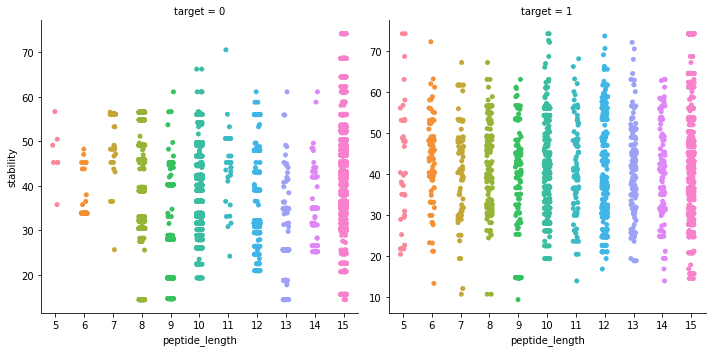

In [23]:
plt.figure(figsize=(30,30))
sns.catplot(y='stability',x='peptide_length',data=df, ci=None,col='target', sharey=False)

#### INSIGHTS-

1. Most of the peptides show stability within range 20 to 60 at positive target.
2. Most of the peptides show stability within range 20 to 80 at negative target

**Distribution of numeric independent variables.**

The distribution of all the numeric variables and skewness of each variable

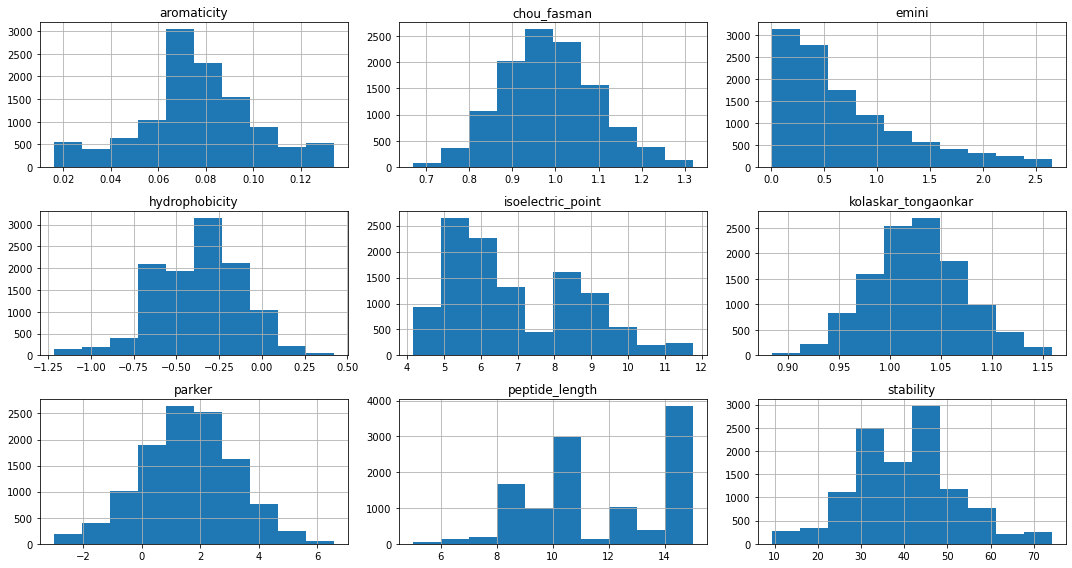

Skewness:


chou_fasman            0.192803
emini                  1.211113
kolaskar_tongaonkar    0.095891
parker                -0.064686
isoelectric_point      0.574662
aromaticity           -0.198926
hydrophobicity        -0.311733
stability              0.250724
peptide_length         0.078519
dtype: float64

In [24]:

df_feature.hist()


plt.tight_layout()


plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

df_feature.skew()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

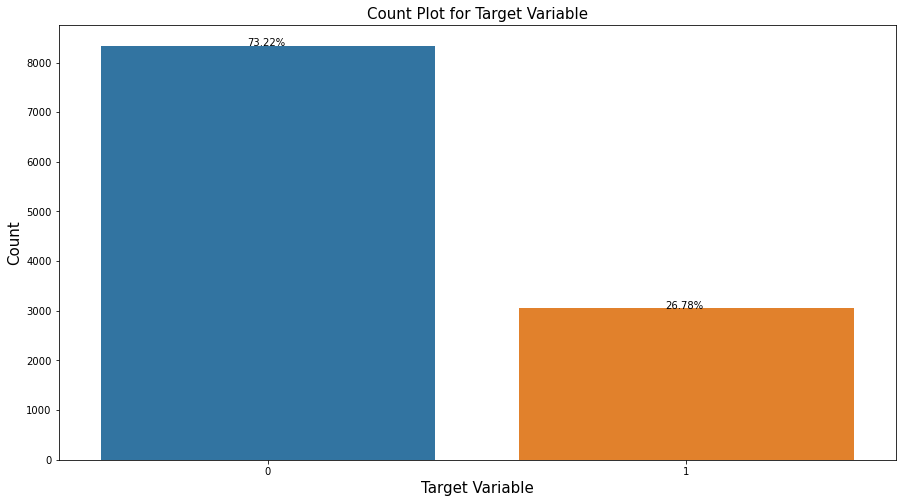

In [25]:
# get counts of 0's and 1's in the target variable
df_target.value_counts()

# plot the countplot of the target variable
sns.countplot(x = df_target)

plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Scaling all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [26]:
df_feature=df_feature.drop(['protein_seq','peptide_seq', 'parent_protein_id'],axis=1)

In [27]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df_feature.columns)

# display first five observations
X.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,peptide_length
0,0.268694,0.008401,-0.180279,0.392155,-0.615173,1.082104,0.835941,0.014293,-2.299582
1,2.058334,2.043397,-1.948154,1.898898,-0.014524,1.105469,-0.810849,-1.610505,-2.299582
2,-0.526702,-0.255050,1.391166,-0.429705,-0.014524,1.105469,-0.810849,-1.610505,-2.299582
3,-0.888246,-0.109814,-1.140606,0.666108,-0.014524,1.105469,-0.810849,-1.610505,-2.299582
4,-1.557101,0.935549,-0.420361,0.255178,-0.014524,1.105469,-0.810849,-1.610505,-2.299582


In [28]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9112, 9)
y_train (9112,)
X_test (2278, 9)
y_test (2278,)


#### The data is imbalanced, so we are using SMOTE for oversampling the records

In [29]:
unique, count=np.unique(y_train, return_counts=True)
y_train_dict_value_count= {k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 6666, 1: 2446}

In [30]:
smote=SMOTE(random_state=12)
X_train, y_train=smote.fit_resample(X_train, y_train)

In [31]:
unique, count=np.unique(y_train, return_counts=True)
y_train_dict_value_count= {k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 6666, 1: 6666}

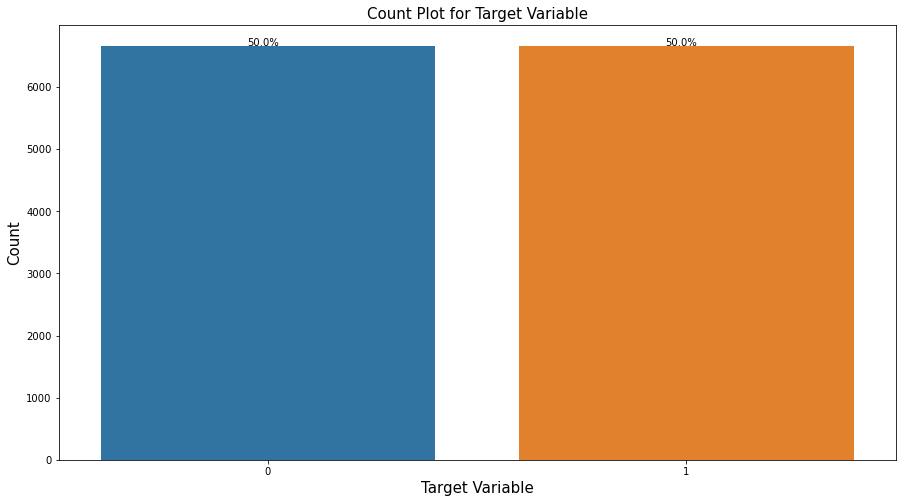

In [32]:
# plot the countplot of the target variable
sns.countplot(x = y_train)


plt.text(x = -0.05, y = y_train.value_counts()[0] + 1, s = str(round((y_train.value_counts()[0])*100/len(y_train),2)) + '%')
plt.text(x = 0.95, y = y_train.value_counts()[1] +1, s = str(round((y_train.value_counts()[1])*100/len(y_train),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

#### Define a function to plot the ROC curve.

In [33]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Antibody Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [34]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )
    plt.title('Confusion matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [35]:
def get_test_report(model):
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

<a id="nb"> </a>
# Gaussian Naive Bayes

In [36]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

# predict the attrition for test set
y_pred = gnb_model.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1674
           1       0.38      0.65      0.48       604

    accuracy                           0.63      2278
   macro avg       0.61      0.64      0.60      2278
weighted avg       0.71      0.63      0.65      2278



In [37]:
print('Train accuracy', gnb_model.score(X_train, y_train))
print('Test accuracy', gnb_model.score(X_test, y_test))

Train accuracy 0.6246624662466247
Test accuracy 0.6294995610184372


**Interpretation:** The recall for the positive class (i.e. antibody will hold the antigen) and the recall of the negative class (i.e. antibody will not hold the antigen) are stable.
Thus, we can say that our model is performing good, but we need to improve the performance.


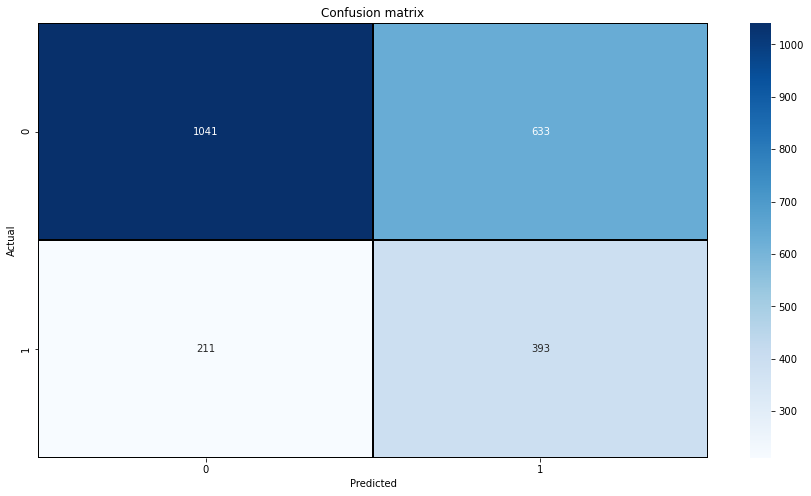

In [38]:
plot_confusion_matrix(gnb_model)

**ROC plot**

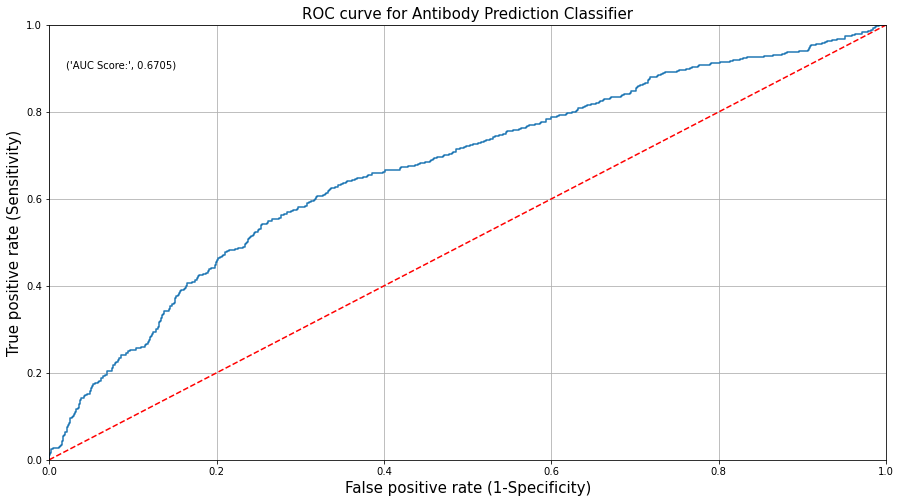

In [39]:
# plot the ROC curve
plot_roc(gnb_model)

**Gaussian Naive Bayes model with 10 fold cross validation and accuracy.**

In [40]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()
   
score = cross_val_score(gnb, X_train, y_train, cv = 10)

# calculate the mean score
score = score.mean()

print("Accuracy after 10 fold cross validation: ", round(score, 2))

Accuracy after 10 fold cross validation:  0.62


# Logistic Regression

In [41]:
classifier = LogisticRegression(max_iter = 100, random_state = 42)
model_lr=classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1674
           1       0.37      0.63      0.46       604

    accuracy                           0.61      2278
   macro avg       0.59      0.62      0.58      2278
weighted avg       0.70      0.61      0.64      2278



In [42]:
y_test.value_counts()

0    1674
1     604
Name: target, dtype: int64

In [43]:
print('Train accuracy', classifier.score(X_train, y_train))
print('Test accuracy', classifier.score(X_test, y_test))

Train accuracy 0.6151365136513651
Test accuracy 0.6145741878841089


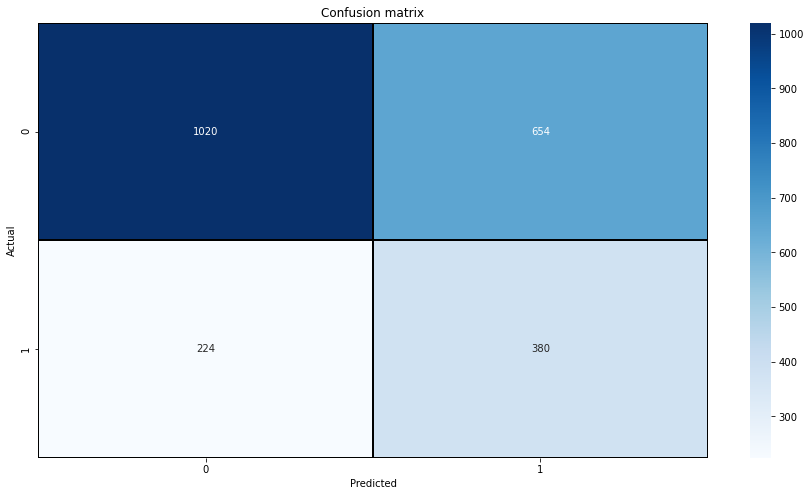

In [44]:
plot_confusion_matrix(model_lr)

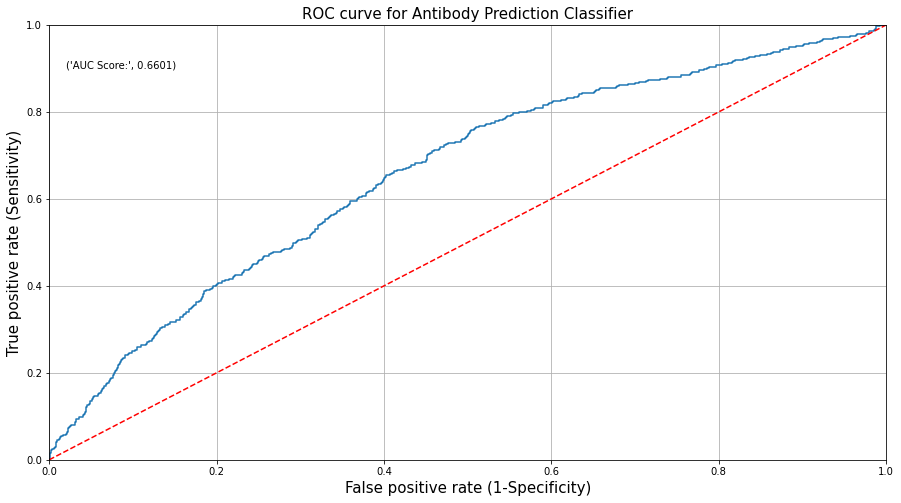

In [45]:
plot_roc(model_lr)

**Logestic regression model with 10 fold cross validation.**

In [46]:
log_reg =  LogisticRegression()
score1=cross_val_score(log_reg, X_train, y_train, cv=10)
score1=score1.mean()
print("Accuracy after 10 fold cross validation:", score1)

Accuracy after 10 fold cross validation: 0.6147612615297752


#  K-Nearest Neighbor Classifier

In [47]:
knn_classification = KNeighborsClassifier(n_neighbors = 7)
knn_model = knn_classification.fit(X_train, y_train)

In [48]:
y_pred = knn_model.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1674
           1       0.54      0.70      0.61       604

    accuracy                           0.76      2278
   macro avg       0.71      0.74      0.72      2278
weighted avg       0.79      0.76      0.77      2278



In [49]:
print('Train accuracy', knn_model.score(X_train, y_train))
print('Test accuracy', knn_model.score(X_test, y_test))

Train accuracy 0.8855385538553855
Test accuracy 0.7633889376646181


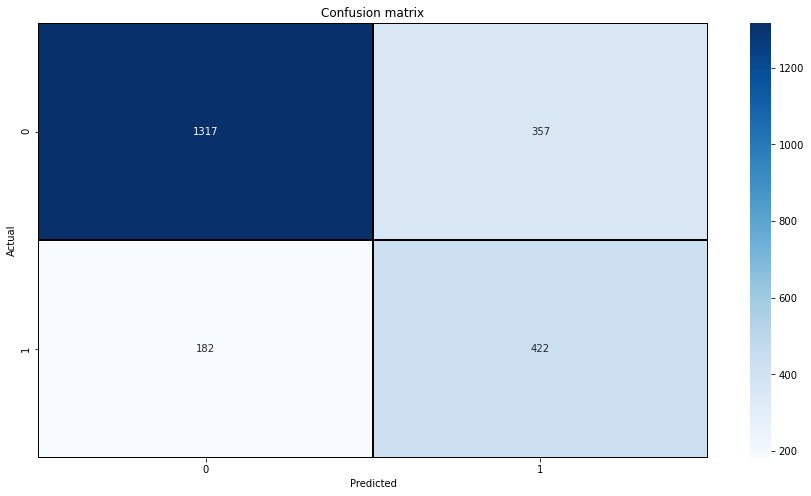

In [50]:
plot_confusion_matrix(knn_model)

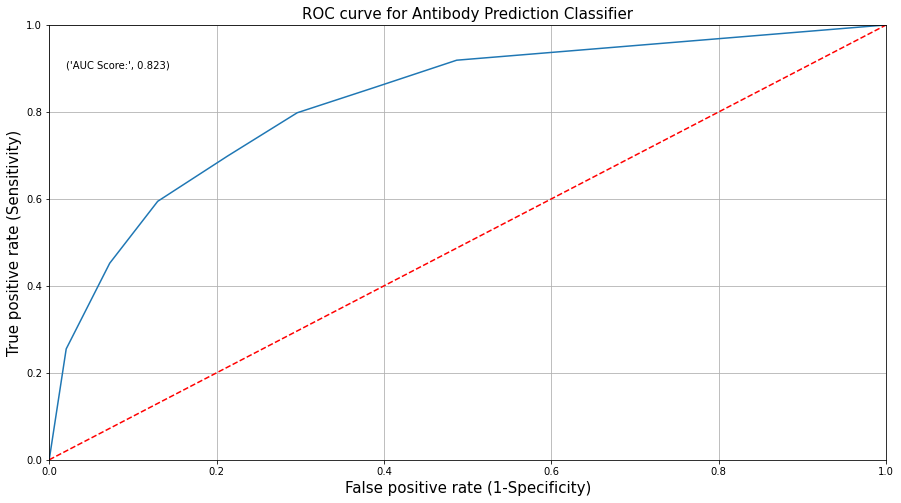

In [51]:
plot_roc(knn_model)

**KNN model with 10 fold cross validation.**

In [52]:
knn_model1 =  KNeighborsClassifier()
score2=cross_val_score(knn_model1, X_train, y_train, cv=10)
score2=score2.mean()
print("Accuracy after 10 fold cross validation:", score2)

Accuracy after 10 fold cross validation: 0.8525413024920399


**Hyper-parameter tuning using GridSearchCV**

In [53]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [54]:
knn_classification2 = KNeighborsClassifier(n_neighbors = 1, metric='manhattan')

knn_model2 = knn_classification2.fit(X_train, y_train)

In [55]:
y_pred = knn_model2.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1674
           1       0.64      0.60      0.62       604

    accuracy                           0.80      2278
   macro avg       0.75      0.74      0.74      2278
weighted avg       0.80      0.80      0.80      2278



In [56]:
print('Train accuracy', knn_model2.score(X_train, y_train))
print('Test accuracy', knn_model2.score(X_test, y_test))

Train accuracy 0.9993999399939995
Test accuracy 0.8024582967515365


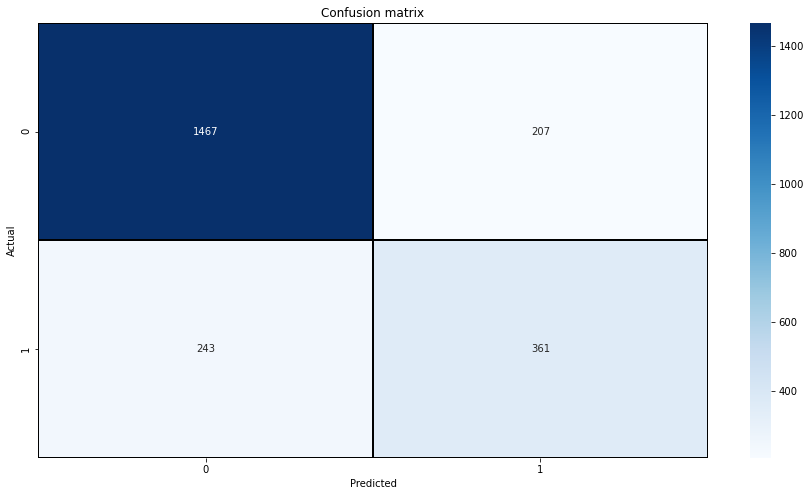

In [57]:
plot_confusion_matrix(knn_model2)


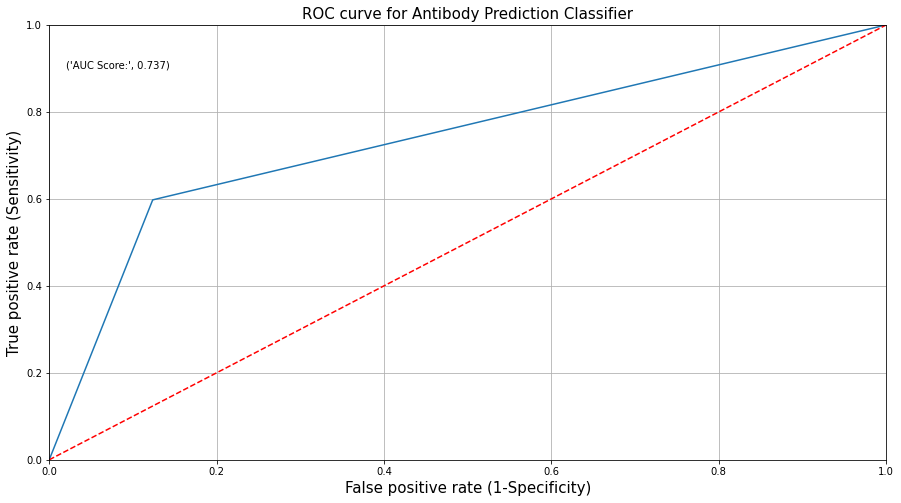

In [58]:
plot_roc(knn_model2)

In [59]:
y_pred = knn_model2.predict(X_test)
cm=confusion_matrix(y_pred, y_test)

total=cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]

perc_correct=((cm[0][0]+cm[1][1])/total)*100
print("Correctly classified:", perc_correct)

perc_missclassified=((cm[0][1]+cm[1][0])/total)*100
print("Missclassied percentage:",perc_missclassified )

Correctly classified: 80.24582967515364
Missclassied percentage: 19.754170324846356


In [60]:
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\\Library\\bin\\graphviz"
from sklearn import tree
import pydotplus

# Decision Tree Classifier

In [104]:
decision_tree_classification = DecisionTreeClassifier( max_leaf_nodes =20,random_state = 10)
decision_tree1 = decision_tree_classification.fit(X_train, y_train)


y_pred=decision_tree1.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.74      0.80      1674
           1       0.50      0.74      0.60       604

    accuracy                           0.74      2278
   macro avg       0.69      0.74      0.70      2278
weighted avg       0.78      0.74      0.75      2278



In [107]:
print('Train accuracy', decision_tree1.score(X_train, y_train))
print('Test accuracy', decision_tree1.score(X_test, y_test))

Train accuracy 0.7663516351635163
Test accuracy 0.7361720807726075


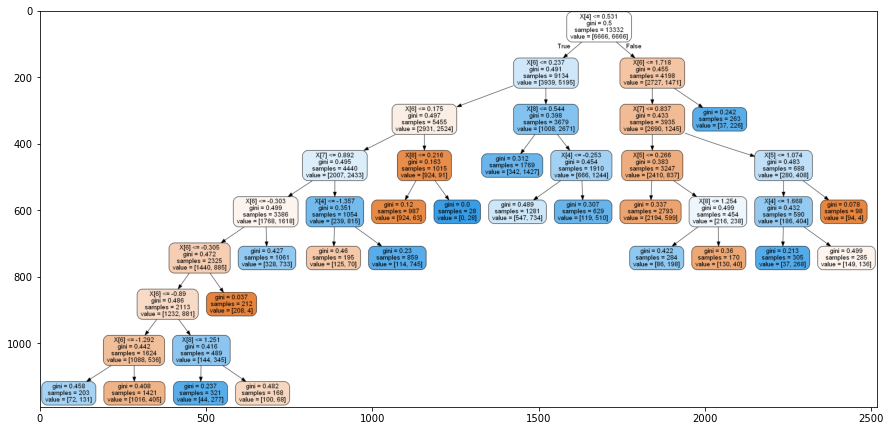

In [108]:
dot_data=tree.export_graphviz(decision_tree1,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.imshow(plt.imread('tree.png'))



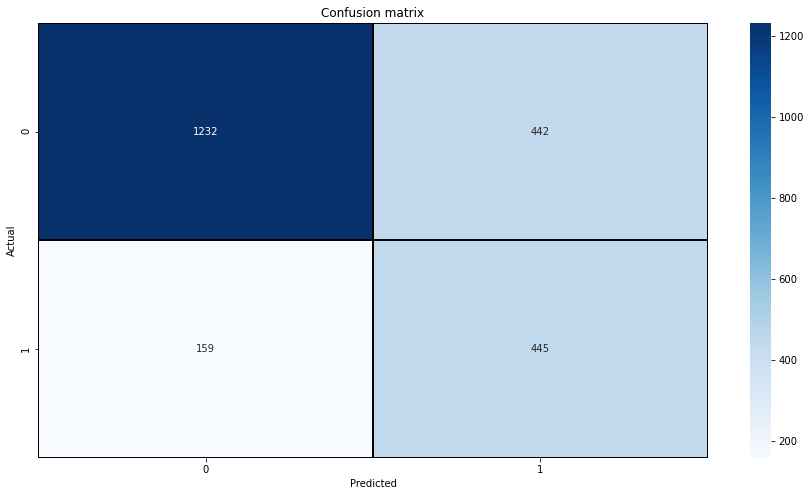

In [105]:
plot_confusion_matrix(decision_tree1)

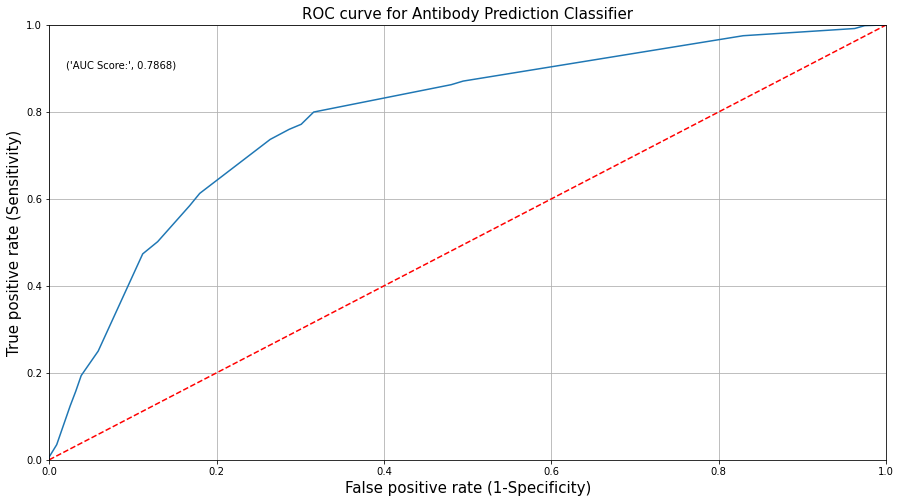

In [106]:
plot_roc(decision_tree1)

**Hyperparameter tuning**

In [66]:
# type your code here
tuned_paramaters = [{'criterion': ['entropy', 'gini']}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


In [67]:
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy'} 



In [68]:
depth_values = np.arange(0,25,2)
tuned_paramaters = [{'max_depth': depth_values}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 24} 



In [69]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy', max_depth=24, max_leaf_nodes=30, random_state=10)
decision_tree2 = decision_tree_classification.fit(X_train, y_train)


y_pred=decision_tree2.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1674
           1       0.53      0.75      0.62       604

    accuracy                           0.76      2278
   macro avg       0.71      0.76      0.72      2278
weighted avg       0.80      0.76      0.77      2278



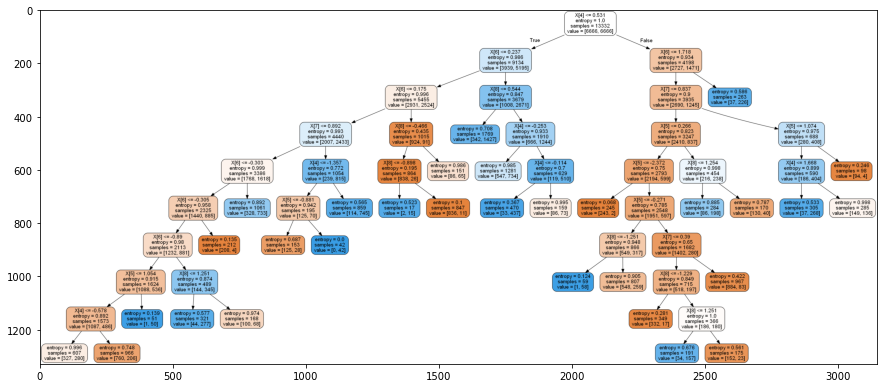

In [70]:
dot_data=tree.export_graphviz(decision_tree2,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.imshow(plt.imread('tree.png'))

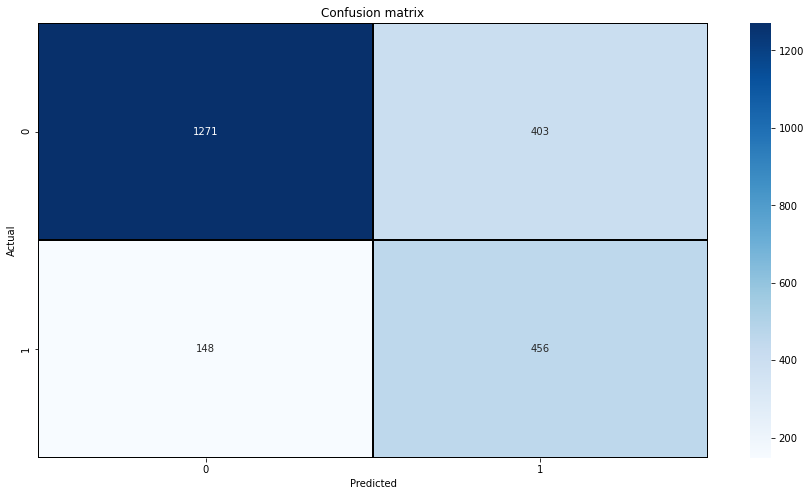

In [71]:
plot_confusion_matrix(decision_tree2)

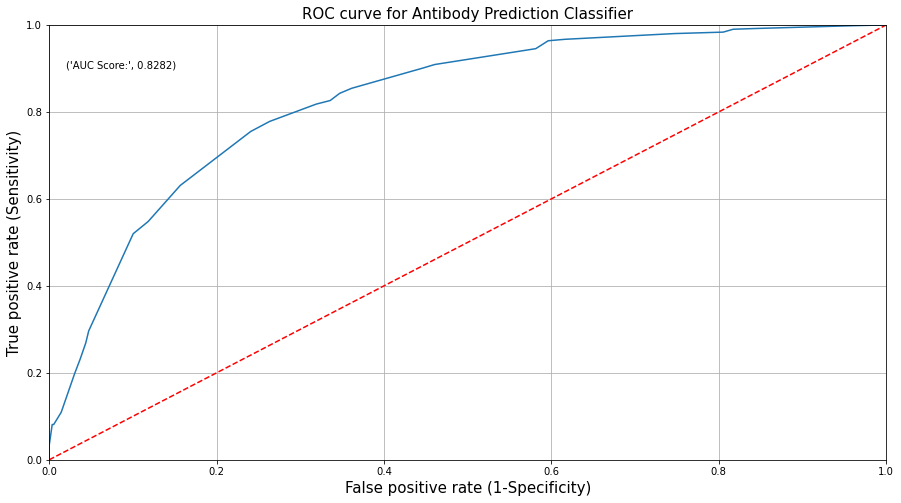

In [72]:
plot_roc(decision_tree2)

# Random Forest Classifier

In [73]:
rf=RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model=rf.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1674
           1       0.73      0.76      0.74       604

    accuracy                           0.86      2278
   macro avg       0.82      0.83      0.82      2278
weighted avg       0.86      0.86      0.86      2278



In [74]:
print('Train accuracy', rf_model.score(X_train, y_train))
print('Test accuracy', rf_model.score(X_test, y_test))

Train accuracy 0.9993999399939995
Test accuracy 0.8617208077260755


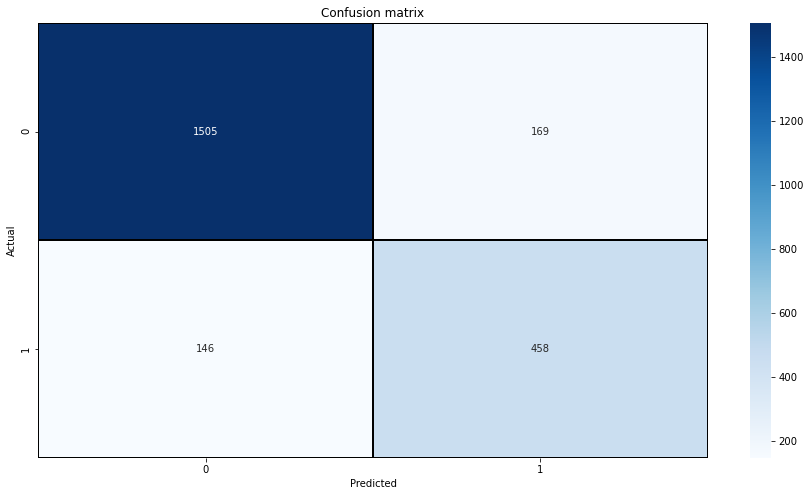

In [75]:
plot_confusion_matrix(rf_model)

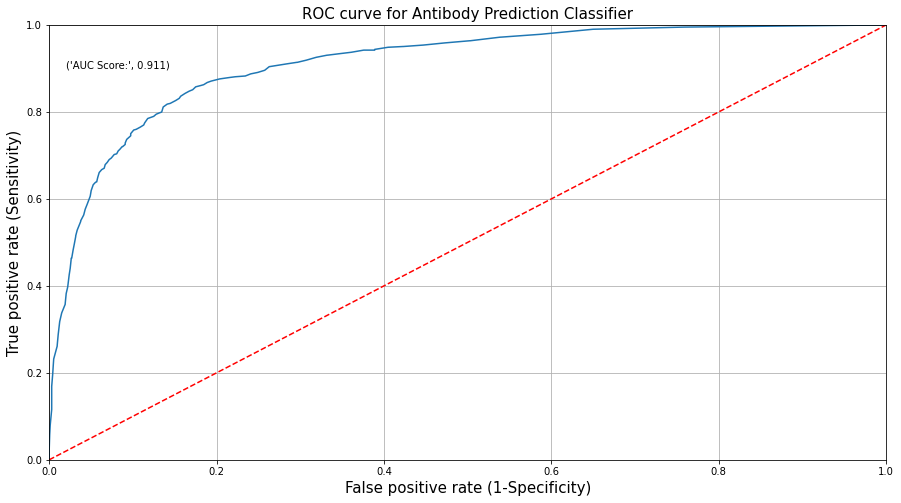

In [76]:
plot_roc(rf_model)

In [77]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [ 70, 90],
                     'max_depth': [10, 15],
                     'min_samples_split': [2, 5]}]
                      
# instantiate the 'RandomForestClassifier' 
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 70} 



In [78]:
rf1=RandomForestClassifier(n_estimators = 70,criterion='gini',max_depth=15,min_samples_split= 2)
rf_model1=rf1.fit(X_train,y_train)
y_pred=rf_model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1674
           1       0.72      0.79      0.75       604

    accuracy                           0.86      2278
   macro avg       0.82      0.84      0.83      2278
weighted avg       0.87      0.86      0.86      2278



In [79]:
print('Train accuracy', rf_model1.score(X_train, y_train))
print('Test accuracy', rf_model1.score(X_test, y_test))

Train accuracy 0.9771977197719772
Test accuracy 0.8612818261633012


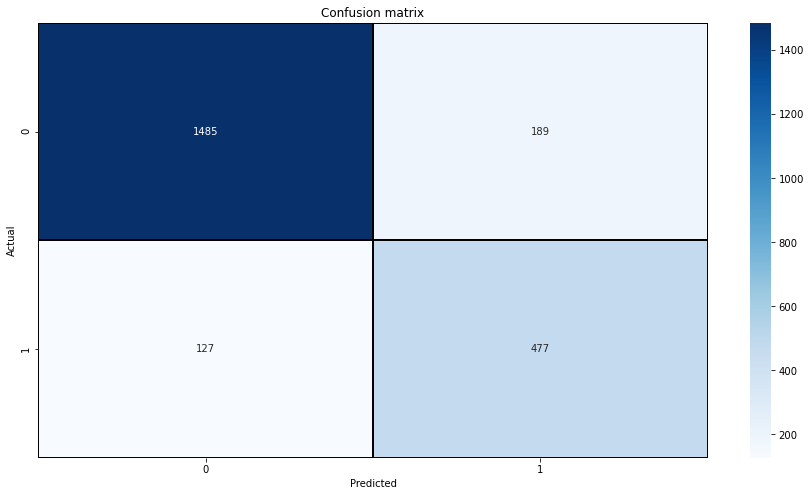

In [80]:
plot_confusion_matrix(rf_model1)

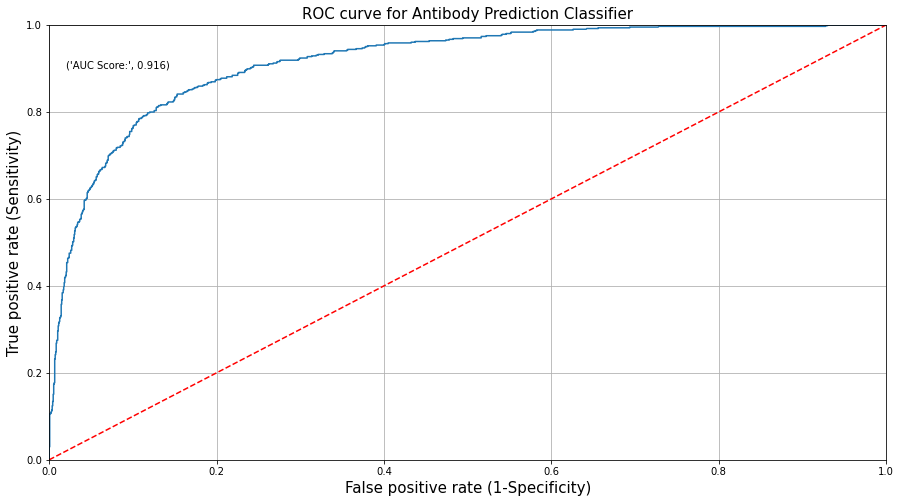

In [81]:
plot_roc(rf_model1)

# Boosting Methods

## AdaBoost

In [82]:
ada_model = AdaBoostClassifier(n_estimators = 1000, learning_rate=1, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1674
           1       0.61      0.73      0.66       604

    accuracy                           0.80      2278
   macro avg       0.75      0.78      0.76      2278
weighted avg       0.82      0.80      0.81      2278



In [83]:
print('Train accuracy', ada_model.score(X_train, y_train))
print('Test accuracy', ada_model.score(X_test, y_test))

Train accuracy 0.8457845784578458
Test accuracy 0.8024582967515365


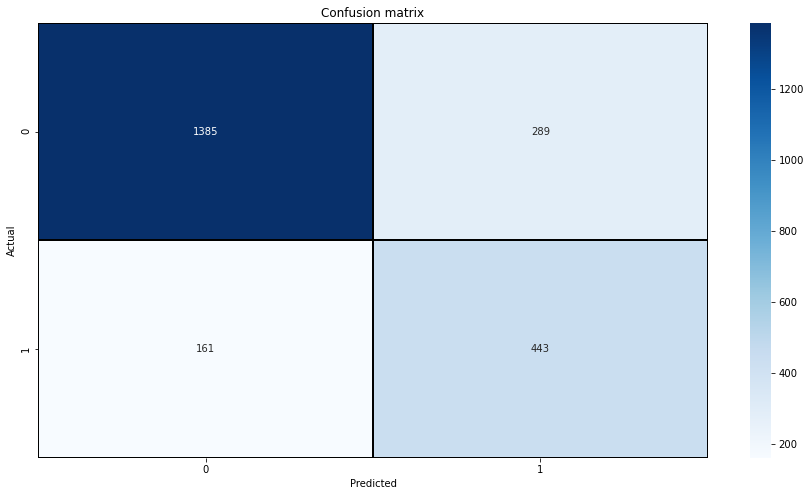

In [84]:
plot_confusion_matrix(ada_model)

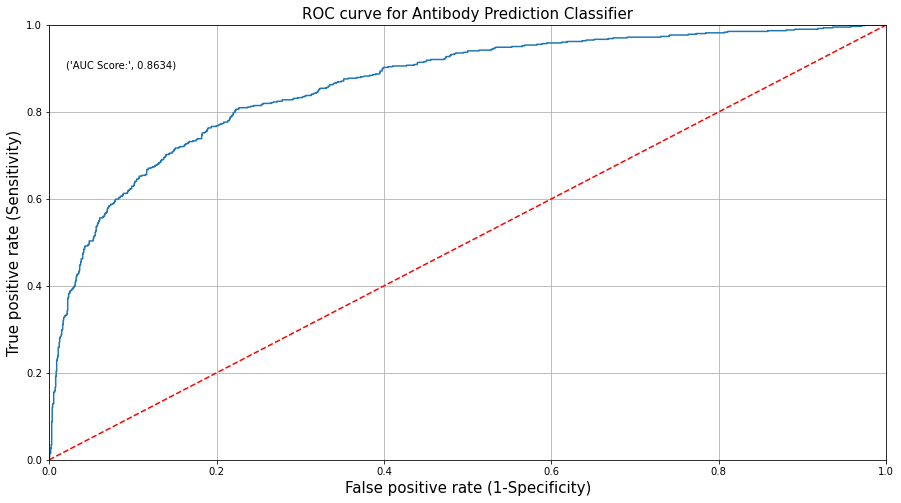

In [85]:
plot_roc(ada_model)

In [86]:
tuning_parameters = {'n_estimators': [10, 50, 100, 500,1000],
                     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                     }

# instantiate the 'AdaBoostClassifier' 
ada_model1 = AdaBoostClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
ada_grid = GridSearchCV(estimator = ada_model1, param_grid = tuning_parameters, cv = 3)

# fit the model on X_train and y_train using fit()
ada_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 1.0, 'n_estimators': 1000} 



## Gradient Boosting

In [87]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1674
           1       0.72      0.75      0.73       604

    accuracy                           0.86      2278
   macro avg       0.81      0.82      0.82      2278
weighted avg       0.86      0.86      0.86      2278



In [88]:
print('Train accuracy', gboost_model.score(X_train, y_train))
print('Test accuracy', gboost_model.score(X_test, y_test))

Train accuracy 0.9993999399939995
Test accuracy 0.8564530289727832


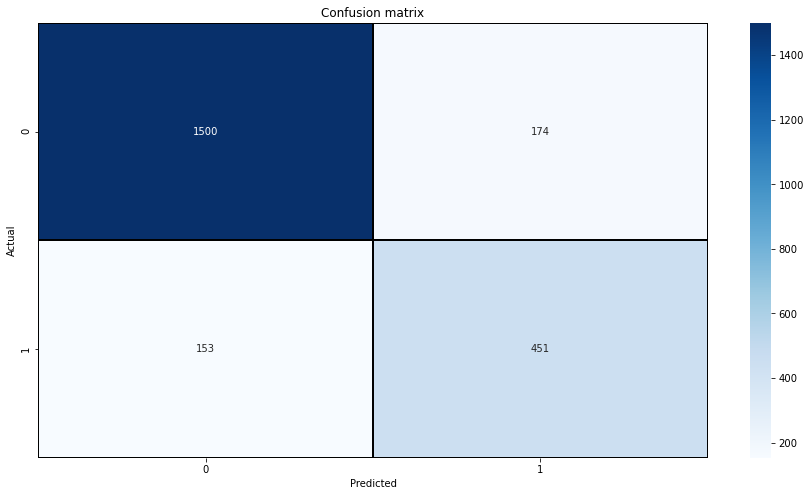

In [89]:
plot_confusion_matrix(gboost_model)

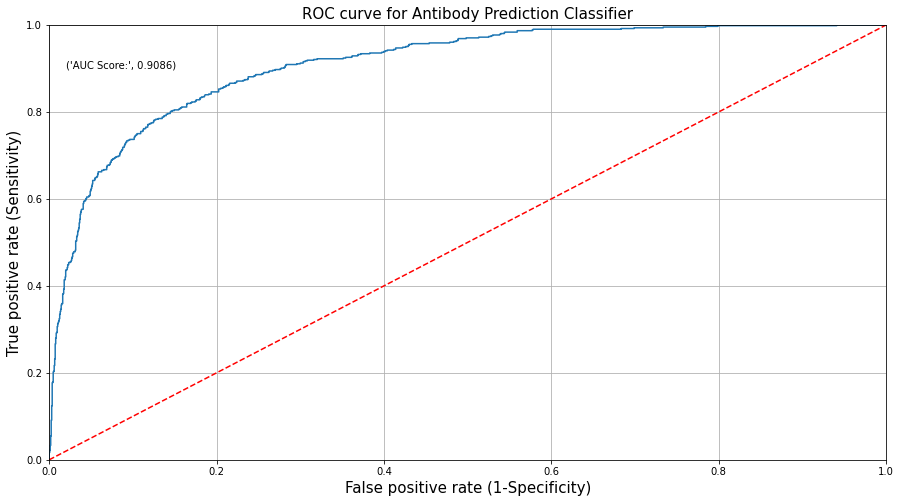

In [90]:
plot_roc(gboost_model)

In [92]:
#tuning_parameters = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0], 'n_estimators':[100,150,250,500,1000],
                     'max_depth': range(3,10),
                     }

# instantiate the 'GradientBoostingClassifier' 
#gboost_model1 = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
#gboost_model1_grid = GridSearchCV(estimator =gboost_model1, param_grid = tuning_parameters, cv = 3)

# fit the model on X_train and y_train using fit()
#gboost_model1_grid.fit(X_train, y_train)

# get the best parameters
#print('Best parameters for XGBoost classifier: ', gboost_model1_grid.best_params_, '\n')

IndentationError: unexpected indent (<ipython-input-92-4ae9ae90e032>, line 2)

## XGBoost

In [ ]:
xgb_model = XGBClassifier(max_depth = 20, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

test_report = get_test_report(xgb_model)
# print the performance measures
print(test_report)

In [ ]:
print('Train accuracy', xgb_model.score(X_train, y_train))
print('Test accuracy', xgb_model.score(X_test, y_test))

In [ ]:
plot_confusion_matrix(xgb_model)

In [ ]:
plot_roc(xgb_model)

**Hyperparameter tuning for XGBOOST**

In [93]:
tuning_parameters = {'learning_rate': [0.0, 0.1, 0.2],
                     'max_depth': range(3,10),
                     }

# instantiate the 'XGBClassifier' 
xgb_model1 = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model1, param_grid = tuning_parameters, cv = 3)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[19:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

**Model building using the tuned parameter**

In [94]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'), gamma=1)

# use fit() to fit the model on the train set
xgb_model1 = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

[19:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'xgb_model' is not defined

In [ ]:
plot_confusion_matrix(xgb_model1)

In [ ]:
plot_roc(xgb_model1)

**Identify the Important Features**

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Stacking classifier using the Random forest, KNN and Gradient boost as base learners

In [ ]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('GB_model',GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10) )]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator =GaussianNB() )

# fit the model on train dataset
stack_model.fit(X_train, y_train)

test_report = get_test_report(stack_model)
# print the performance measures
print(test_report)

In [ ]:
print('Train accuracy', stack_model.score(X_train, y_train))
print('Test accuracy', stack_model.score(X_test, y_test))

In [ ]:
plot_roc(stack_model)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state=0),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors = 7),
},
{
    'label': ' Decsion Tree',
    'model': DecisionTreeClassifier(criterion='entropy', max_depth=24, max_leaf_nodes=30, random_state=10),
},    
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100, random_state = 42),
},
{
    'label': 'AdaBoost',
    'model': AdaBoostClassifier(n_estimators = 1000, random_state = 10),
},    
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(n_estimators = 1000, max_depth = 10, random_state = 10),
},

{
    'label': 'XG Boost',
    'model': XGBClassifier(max_depth = 20, gamma = 1),
}
    
]
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC ' % (m['label']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   


In [ ]:
names= ['Gaussian','Logestic regression','K Nearest Neighbors','Decision tree',
        'Random Forest','Ada Boosting','Gradient boosting','XG boosting']

classifiers=[
    GaussianNB(),
    LogisticRegression(random_state = 0),
    KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean'),    
    DecisionTreeClassifier(criterion='entropy', max_depth=24, max_leaf_nodes=10, random_state=10),
    RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10),
    AdaBoostClassifier(n_estimators = 1000, random_state = 10),
    GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10),
    XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
]


In [ ]:
scores=[]

for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    scores.append(score)

In [ ]:
scores

In [ ]:
comp_df=pd.DataFrame()

comp_df['Name']= names
comp_df['Score']= scores

comp_df

In [ ]:
sns.barplot(data= comp_df, x='Name',y='Score',palette="ch:start=.2,rot=-.3")

